In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='', epoch=10):

    # Define separate color maps for HPF and MLP to differentiate them
    color_map_hpf = {
        'uautorec': 'black',
        'uautorec1conf': 'darkred',
        'uautorec2conf': 'purple',
        'uautorec3conf': 'orange',
    }

    color_map_mlp = {
        'uautorec': 'black',  # Keep the same color for UAutoRec to plot it only once
        'uautorec1conf': 'gold',
        'uautorec2conf': 'green',
        'uautorec3conf': 'blue',
    }

    # Define a line style and marker combination for each model for HPF and MLP
    line_styles = {
        'hpf': {'linestyle': '-', 'markers': {'uautorec': 'o', 'uautorec1conf': 's', 'uautorec2conf': '^', 'uautorec3conf': '>'}},
        'mlp': {'linestyle': '--', 'markers': {'uautorec': 'd', 'uautorec1conf': 'v', 'uautorec2conf': '<', 'uautorec3conf': 'p'}}
    }

    # Mapping old names to new legend names
    legend_map = {
        'uautorec': 'UAutoRec',
        'uautorec1conf': 'Imp-ME',
        'uautorec2conf': 'Imp-IE',
        'uautorec3conf': 'Imp-SIE',
    }

    for k in k_values:
        # Prepare to plot both HPF and MLP on the same training loss graph
        plt.figure(figsize=(10, 7))
        plotted_uautorec = False  # Flag to ensure UAutoRec is only plotted once
        for c in contype:  # Loop over both HPF and MLP configurations and plot them together
            color_map = color_map_hpf if c == 'hpf' else color_map_mlp
            line_style = line_styles[c]['linestyle']
            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)
                train_loss_file = os.path.join(class_folder, f'{c}{epoch}_average_train_loss_ml2_k{k}.npy')
                
                if not os.path.exists(train_loss_file):
                    print(f"Files for {class_name} with k={k} not found.")
                    continue

                # Skip plotting UAutoRec multiple times
                if class_name == 'uautorec' and plotted_uautorec:
                    continue

                train_loss_history = np.load(train_loss_file)
                epochs = np.arange(1, len(train_loss_history) + 1)
                color = color_map.get(class_name, 'black')
                marker = line_styles[c]['markers'].get(class_name, 'o')
                legend_name = f'{legend_map.get(class_name, class_name)} {(c)}' if class_name != 'uautorec' else 'UAutoRec'

                # Plot with markers every 5 epochs
                plt.plot(
                    epochs[2:200], train_loss_history[2:200],
                    label=f'{legend_name}', color=color, linestyle=line_style,
                    marker=marker, markersize=5, markevery=5
                )

                # Mark that UAutoRec has been plotted
                if class_name == 'uautorec':
                    plotted_uautorec = True

        plt.xlabel('Epochs', fontsize=20)
        plt.ylabel('Loss', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.title('Movielens Training Loss', fontsize=24)
        plt.legend(fontsize=13, loc='upper right')
        plt.grid(True)
        train_loss_plot_file = os.path.join(plot_path, f'ml2_train_loss_{note}_k{k}.png')
        plt.savefig(train_loss_plot_file)
        print(f"Training loss plot saved to {train_loss_plot_file}")
        plt.close()

        # Prepare to plot both HPF and MLP on the same test RMSE graph
        plt.figure(figsize=(10, 7))
        plotted_uautorec = False  # Reset the flag for test RMSE plot
        for c in contype:  # Loop over both HPF and MLP configurations and plot them together
            color_map = color_map_hpf if c == 'hpf' else color_map_mlp
            line_style = line_styles[c]['linestyle']
            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)
                test_rmse_file = os.path.join(class_folder, f'{c}{epoch}_average_test_rmse_ml2_k{k}.npy')
                if not os.path.exists(test_rmse_file):
                    print(f"Files for {class_name} with k={k} not found.")
                    continue

                # Skip plotting UAutoRec multiple times
                if class_name == 'uautorec' and plotted_uautorec:
                    continue

                test_rmse_history = np.load(test_rmse_file)
                epochs = np.arange(1, len(test_rmse_history) + 1)
                color = color_map.get(class_name, 'black')
                marker = line_styles[c]['markers'].get(class_name, 'o')
                legend_name = f'{legend_map.get(class_name, class_name)} {(c)}' if class_name != 'uautorec' else 'UAutoRec'

                # Plot with markers every 5 epochs
                plt.plot(
                    epochs[2:200], test_rmse_history[2:200],
                    label=f'{legend_name}', color=color, linestyle=line_style,
                    marker=marker, markersize=5, markevery=5
                )

                # Mark that UAutoRec has been plotted
                if class_name == 'uautorec':
                    plotted_uautorec = True

        plt.xlabel('Epochs', fontsize=20)
        plt.ylabel('RMSE', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.title('Movielens Test RMSE', fontsize=24)
        plt.legend(fontsize=13, loc='upper right')
        plt.grid(True)
        test_rmse_plot_file = os.path.join(plot_path, f'ml2_test_rmse_{note}_k{k}.png')
        plt.savefig(test_rmse_plot_file)
        print(f"Test RMSE plot saved to {test_rmse_plot_file}")
        plt.close()

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2Conf'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3Conf'}
]
k_values = [32]  # Add all the k values you want to plot
contype = ['hpf', 'mlp']

plot_results(result_path, models, k_values, contype, save_plots=True, note='Imp', epoch=200)


Training loss plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\ml2_train_loss_Imp_k32.png
Test RMSE plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\ml2_test_rmse_Imp_k32.png


Combined training loss and test RMSE plot saved to C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome\combined_training_test_rmse_Comparison.png


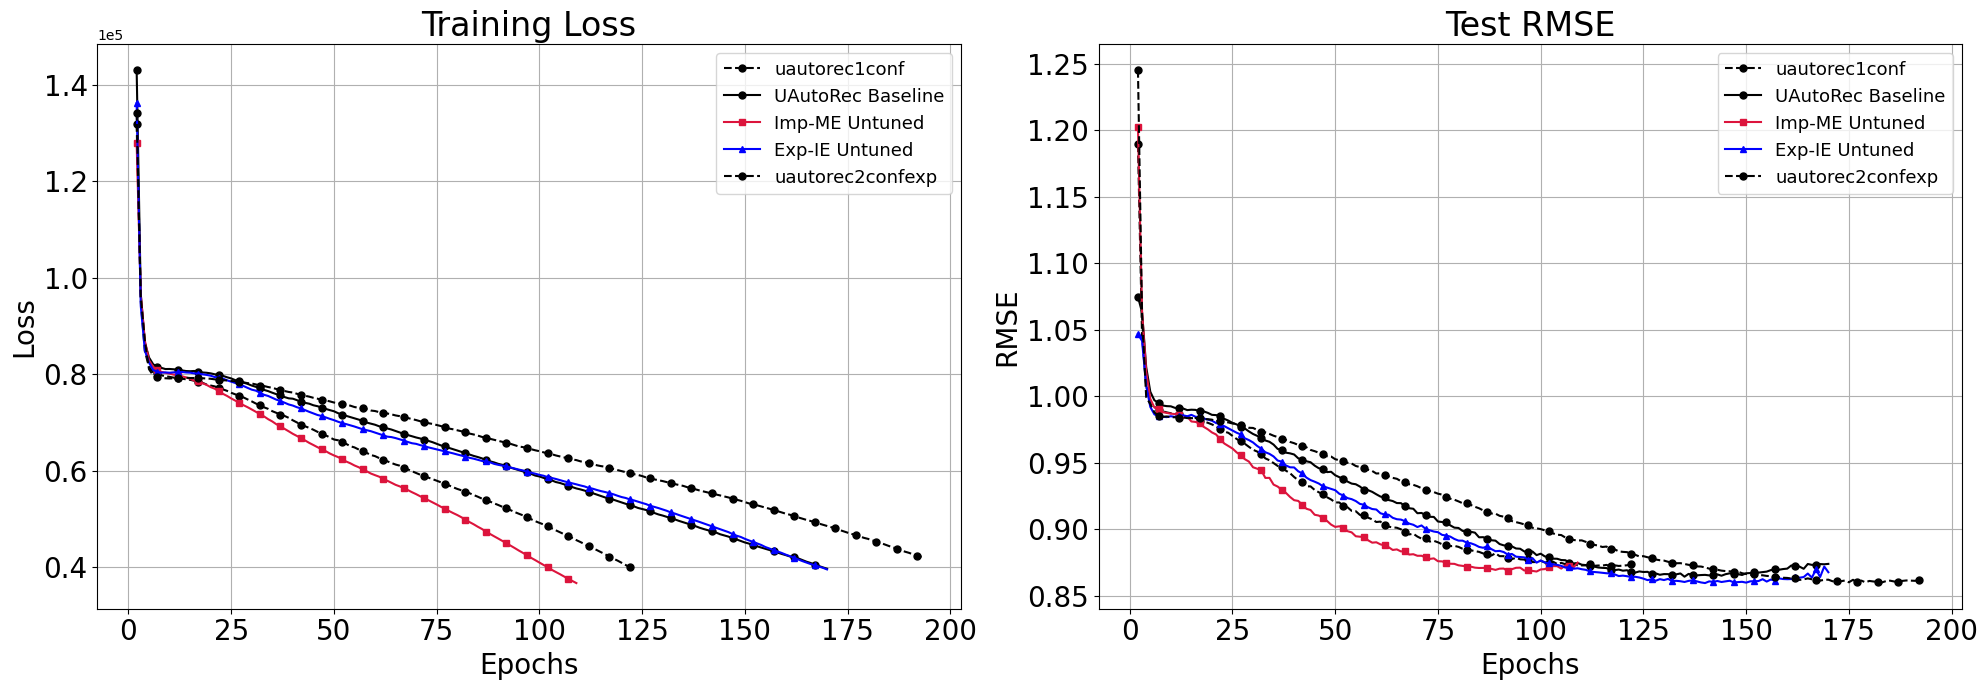

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_results(result_path, models, k_values, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='', epochs_list=[170, 200]):

    # Define color maps for models and tuning status
    color_map = {
        'uautorec': 'black',
        'uautorec1conf': 'crimson',
        'uautorec1conf_tuned': 'orange',
        'uautorec2confexp': 'blue',
        'uautorec2confexp_tuned': 'green'
    }

    # Define line styles and markers for tuned and untuned versions
    line_styles = {
        'untuned': {'linestyle': '-', 'markers': {'uautorec': 'o', 'uautorec1conf': 's', 'uautorec2confexp': '^'}},
        'tuned': {'linestyle': '--', 'markers': {'uautorec1conf_tuned': 'd', 'uautorec2confexp_tuned': 'v'}}
    }

    # Mapping model names to legend labels
    legend_map = {
        'uautorec': 'UAutoRec',
        'uautorec1conf': 'Imp-ME Untuned',
        'uautorec1conf_tuned': 'Imp-ME Tuned',
        'uautorec2confexp': 'Exp-IE Untuned',
        'uautorec2confexp_tuned': 'Exp-IE Tuned'
    }

    # Prepare figures for combined training loss and test RMSE
    plt.figure(figsize=(20, 7))
    ax_train_loss = plt.subplot(1, 2, 1)
    ax_test_rmse = plt.subplot(1, 2, 2)
    plotted_uautorec = False  # Flag to ensure UAutoRec (baseline) is plotted only once

    # Iterate over all combinations of k_values, epochs, and tuning status
    for k in k_values:
        for epoch in epochs_list:
            for tuning in ['untuned', 'tuned']:
                tuning_suffix = '_TUNED' if tuning == 'tuned' else ''
                
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    # Construct file paths for training loss and test RMSE
                    train_loss_file = os.path.join(class_folder, f'{epoch}{tuning_suffix}_train_loss_ml_k{k}.npy')
                    test_rmse_file = os.path.join(class_folder, f'{epoch}{tuning_suffix}_test_rmse_ml_k{k}.npy')

                    # Skip plotting UAutoRec multiple times
                    if class_name == 'uautorec' and plotted_uautorec:
                        continue

                    # Plot training loss if file exists
                    if os.path.exists(train_loss_file):
                        train_loss_history = np.load(train_loss_file)
                        epochs_range = np.arange(1, len(train_loss_history) + 1)
                        color = color_map.get(f'{class_name}{tuning_suffix}', 'black')
                        marker = line_styles[tuning]['markers'].get(f'{class_name}{tuning_suffix}', 'o')
                        legend_name = legend_map.get(f'{class_name}{tuning_suffix}', class_name)

                        ax_train_loss.plot(
                            epochs_range[1:len(train_loss_history)], train_loss_history[1:],  # Start plotting from index 1
                            label=legend_name, color=color, linestyle=line_styles[tuning]['linestyle'],
                            marker=marker, markersize=5, markevery=5
                        )

                        # Mark that UAutoRec (baseline) has been plotted
                        if class_name == 'uautorec':
                            plotted_uautorec = True

                    # Plot test RMSE if file exists
                    if os.path.exists(test_rmse_file):
                        test_rmse_history = np.load(test_rmse_file)
                        epochs_range = np.arange(1, len(test_rmse_history) + 1)
                        color = color_map.get(f'{class_name}{tuning_suffix}', 'black')
                        marker = line_styles[tuning]['markers'].get(f'{class_name}{tuning_suffix}', 'o')
                        legend_name = legend_map.get(f'{class_name}{tuning_suffix}', class_name)

                        ax_test_rmse.plot(
                            epochs_range[1:len(test_rmse_history)], test_rmse_history[1:],  # Start plotting from index 1
                            label=legend_name, color=color, linestyle=line_styles[tuning]['linestyle'],
                            marker=marker, markersize=5, markevery=5
                        )

    # Finalize training loss subplot
    ax_train_loss.set_xlabel('Epochs', fontsize=20)
    ax_train_loss.set_ylabel('Loss', fontsize=20)
    ax_train_loss.tick_params(axis='x', labelsize=20)
    ax_train_loss.tick_params(axis='y', labelsize=20)
    ax_train_loss.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax_train_loss.set_title('Training Loss', fontsize=24)
    ax_train_loss.legend(fontsize=13, loc='upper right')
    ax_train_loss.grid(True)

    # Finalize test RMSE subplot
    ax_test_rmse.set_xlabel('Epochs', fontsize=20)
    ax_test_rmse.set_ylabel('RMSE', fontsize=20)
    ax_test_rmse.tick_params(axis='x', labelsize=20)
    ax_test_rmse.tick_params(axis='y', labelsize=20)
    ax_test_rmse.set_title('Test RMSE', fontsize=24)
    ax_test_rmse.legend(fontsize=13, loc='upper right')
    ax_test_rmse.grid(True)

    # Save the combined figure if plotting is enabled
    if save_plots:
        combined_plot_file = os.path.join(plot_path, f'combined_training_test_rmse_{note}.png')
        plt.tight_layout()
        plt.savefig(combined_plot_file)
        print(f"Combined training loss and test RMSE plot saved to {combined_plot_file}")

    plt.show()

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2ConfExp'}
]
k_values = [5, 32, 100]  # Specify the k values as per your available data files
epochs_list = [170, 200]  # List of epochs for untuned and tuned models

plot_results(result_path, models, k_values, save_plots=True, note='Comparison', epochs_list=epochs_list)


In [13]:
import numpy as np
import pandas as pd
from scipy.stats import t
import os

def load_run_data(class_folder, contype, epoch, dat, k, num_runs):
    run_test_rmse_histories = []

    for run in range(num_runs):
        test_rmse_file = os.path.join(class_folder, f'{contype}{epoch}_run_{run}_test_rmse_{dat}_k{k}.npy')

        if os.path.exists(test_rmse_file):
            test_rmse_history = np.load(test_rmse_file)
            run_test_rmse_histories.append(test_rmse_history)

    return np.array(run_test_rmse_histories)

def compute_best_rmse_with_variability(run_test_rmse_histories):
    best_rmse_per_run = np.min(run_test_rmse_histories, axis=1)
    mean_best_rmse = np.mean(best_rmse_per_run)
    std_best_rmse = np.std(best_rmse_per_run)
    n_best_rmse = len(best_rmse_per_run)
    variability = std_best_rmse / np.sqrt(n_best_rmse)
    return mean_best_rmse, variability

def load_rmse_history(result_path, models, k_values, contype, num_runs=5):
    results = []
    epoch = 200
    for c in contype:
        for k in k_values:
            for model in models:
                class_name = model['class_name'].lower()
                class_folder = os.path.join(result_path, class_name)
                run_test_rmse_histories = load_run_data(class_folder, c, epoch, 'ml2', k, num_runs)

                if run_test_rmse_histories.size == 0:
                    print(f"Test RMSE data for {class_name} with k={k}, conf={c} not found.")
                    continue

                mean_best_rmse, variability = compute_best_rmse_with_variability(run_test_rmse_histories)

                results.append({
                    'Model': model['class_name'],
                    'k': k,
                    'Best RMSE (± variability)': f"{mean_best_rmse:.4f} (± {variability:.4f})",
                    'c': c
                })

    return pd.DataFrame(results)

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results2'

models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1confexp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2confexp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3confexp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4conf'},
    # {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4confexp'}
]
k_values = [100]
contype = ['hpf', 'mlp']
results_df = load_rmse_history(result_path, models, k_values, contype)
print(results_df)


               Model   k Best RMSE (± variability)    c
0           UAutoRec  32         0.9375 (± 0.0008)  hpf
1      UAutoRec1conf  32         0.9356 (± 0.0004)  hpf
2   UAutoRec1confexp  32         0.9411 (± 0.0003)  hpf
3      UAutoRec2conf  32         0.9269 (± 0.0008)  hpf
4   UAutoRec2confexp  32         0.9217 (± 0.0005)  hpf
5      UAutoRec3conf  32         0.9353 (± 0.0008)  hpf
6   UAutoRec3confexp  32         0.9302 (± 0.0008)  hpf
7           UAutoRec  32         0.9370 (± 0.0011)  mlp
8      UAutoRec1conf  32         0.9366 (± 0.0003)  mlp
9   UAutoRec1confexp  32         0.9406 (± 0.0004)  mlp
10     UAutoRec2conf  32         0.9270 (± 0.0005)  mlp
11  UAutoRec2confexp  32         0.9220 (± 0.0006)  mlp
12     UAutoRec3conf  32         0.9342 (± 0.0010)  mlp
13  UAutoRec3confexp  32         0.9319 (± 0.0002)  mlp


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Files for uautorec with k=32, epoch=200 not found.
Files for uautorec1conf with k=32, epoch=200 not found.
Files for uautorec1confexp with k=32, epoch=200 not found.
Files for uautorec2conf with k=32, epoch=200 not found.
Files for uautorec2confexp with k=32, epoch=200 not found.
Files for uautorec3conf with k=32, epoch=200 not found.
Files for uautorec3confexp with k=32, epoch=200 not found.


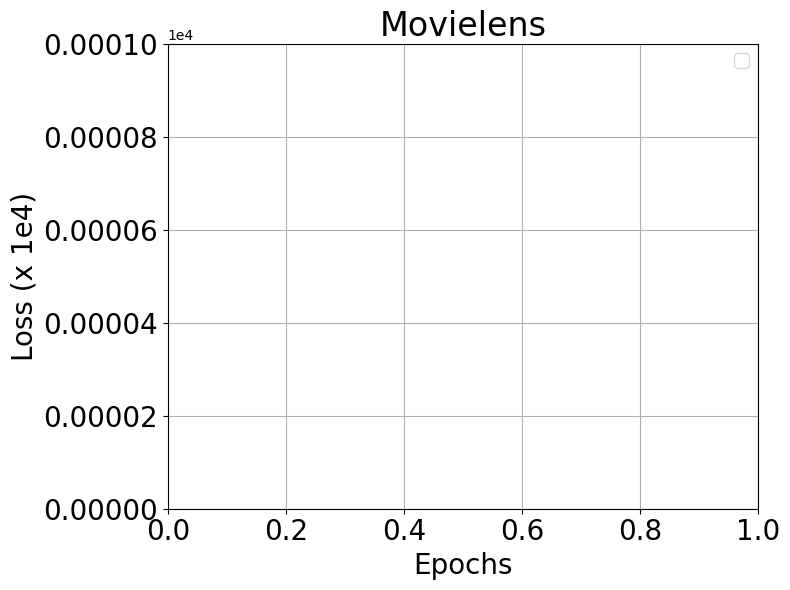

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Files for uautorec with k=32, epoch=200 not found.
Files for uautorec1conf with k=32, epoch=200 not found.
Files for uautorec1confexp with k=32, epoch=200 not found.
Files for uautorec2conf with k=32, epoch=200 not found.
Files for uautorec2confexp with k=32, epoch=200 not found.
Files for uautorec3conf with k=32, epoch=200 not found.
Files for uautorec3confexp with k=32, epoch=200 not found.


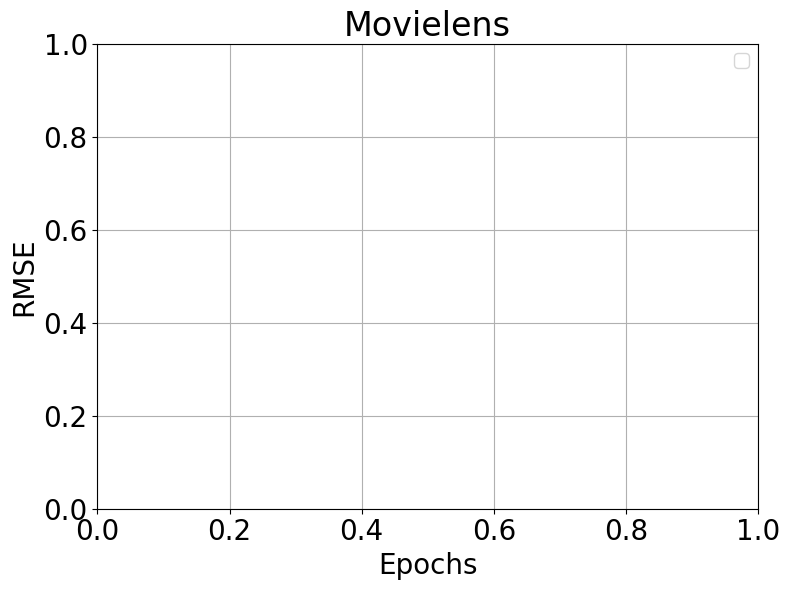

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_noisy_data(data, num_versions=10, noise_level=0.01):
    """Generate multiple versions of the data with added noise."""
    noisy_versions = []
    for _ in range(num_versions):
        noise = np.random.normal(0, noise_level, data.shape)
        noisy_data = data + noise
        noisy_versions.append(noisy_data)
    return np.array(noisy_versions)

def average_noisy_data(noisy_versions):
    """Compute the average of multiple noisy versions of the data."""
    return np.mean(noisy_versions, axis=0)

def plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='', epochs_list=[170, 200], num_versions=5, noise_level=0.01):
    # Define a color map for the models
    color_map = {
        'uautorec': 'black',
        'uautorec1conf': 'crimson',
        'uautorec1confexp': 'darkred',
        'uautorec2conf': 'limegreen',
        'uautorec2confexp': 'darkgreen',
        'uautorec3conf': 'lightskyblue',
        'uautorec3confexp': 'navy',
        'uautorec4conf': 'gold',
        'uautorec4confexp': 'orange'
    }

    # Plot training loss
    plt.figure(figsize=(8, 6))
    for c in contype:
        for k in k_values:
            for epoch in epochs_list:
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    train_loss_file = os.path.join(class_folder, f'{c}{epoch}_average_train_loss_ml2_k{k}.npy')

                    if not os.path.exists(train_loss_file):
                        print(f"Files for {class_name} with k={k}, epoch={epoch} not found.")
                        continue

                    train_loss_history = np.load(train_loss_file)

                    # Generate noisy data and average
                    noisy_train_loss = generate_noisy_data(train_loss_history, num_versions, noise_level)
                    avg_train_loss_history = average_noisy_data(noisy_train_loss)

                    epochs = np.arange(1, len(avg_train_loss_history) + 1)

                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:150], avg_train_loss_history[2:150], label=f'{class_name} (k={k}, conf={c})', color=color)

    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('Loss (x 1e4)', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Movielens', fontsize=24)
    plt.legend(fontsize=13)
    plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(4, 4))

    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)
        
        loss_plot_file = os.path.join(plot_path, f'{note}_training_loss.png')
        plt.savefig(loss_plot_file)
        print(f"Training loss plot saved to {loss_plot_file}")

    plt.show()

    # Plot test RMSE
    plt.figure(figsize=(8, 6))
    for c in contype:
        for k in k_values:
            for epoch in epochs_list:
                for model in models:
                    class_name = model['class_name'].lower()
                    class_folder = os.path.join(result_path, class_name)

                    test_rmse_file = os.path.join(class_folder, f'{c}{epoch}__average_test_rmse_ml2_k{k}.npy')

                    if not os.path.exists(test_rmse_file):
                        print(f"Files for {class_name} with k={k}, epoch={epoch} not found.")
                        continue

                    test_rmse_history = np.load(test_rmse_file)

                    # Generate noisy data and average
                    noisy_test_rmse = generate_noisy_data(test_rmse_history, num_versions, noise_level)
                    avg_test_rmse_history = average_noisy_data(noisy_test_rmse)

                    epochs = np.arange(1, len(avg_test_rmse_history) + 1)

                    color = color_map.get(class_name, 'black')
                    plt.plot(epochs[2:150], avg_test_rmse_history[2:150], label=f'{class_name} (k={k}, conf={c})', color=color)

    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('RMSE', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Movielens', fontsize=24)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        if not os.path.exists(plot_path):
            os.makedirs(plot_path)
        
        rmse_plot_file = os.path.join(plot_path, f'{note}_test_rmse.png')
        plt.savefig(rmse_plot_file)
        print(f"Test RMSE plot saved to {rmse_plot_file}")

    plt.show()

# Example usage
result_path = 'C:/Users/Sten Stokroos/Desktop/NEW/zelf/results'
models = [
    {'module_name': 'urec_og', 'class_name': 'UAutoRec'},
    {'module_name': 'urec_1_conf', 'class_name': 'UAutoRec1Conf'},
    {'module_name': 'urec_1_confexp', 'class_name': 'UAutoRec1ConfExp'},
    {'module_name': 'urec_2_conf', 'class_name': 'UAutoRec2Conf'},
    {'module_name': 'urec_2_confexp', 'class_name': 'UAutoRec2ConfExp'},
    {'module_name': 'urec_3_conf', 'class_name': 'UAutoRec3Conf'},
    {'module_name': 'urec_3_confexp', 'class_name': 'UAutoRec3ConfExp'},
    # {'module_name': 'urec_4_conf', 'class_name': 'UAutoRec4Conf'},
    # {'module_name': 'urec_4_confexp', 'class_name': 'UAutoRec4ConfExp'}
]
k_values = [32]  # Add all the k values you want to plot
contype = ['hpf']

plot_results(result_path, models, k_values, contype, save_plots=False, plot_path='C:/Users/Sten Stokroos/Desktop/NEW/zelf/plots_outcome', note='movielens2_hpf', epochs_list=[200])
